#### Working Notebook

In [1]:
import pandas as pd

In [2]:
taxi_df = pd.read_parquet('data/yellow_tripdata_2019-01.parquet')

In [3]:
taxi_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


In [4]:
taxi_df.shape

(7696617, 19)

In [5]:
taxi_df = taxi_df[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID','PULocationID',
       'DOLocationID', 'payment_type',  'total_amount']]

In [6]:
## Thinking about how to start interogating this data set
## Look at total number of passengers, total amount of fare $, total number of trips

In [7]:
total_passengers = taxi_df['passenger_count'].sum()

In [8]:
total_passengers

12015913.0

In [9]:
total_fare = taxi_df['total_amount'].sum()

In [10]:
total_fare

121688527.91999984

In [11]:
## Need to clean up fare column as that is non real amount of $. Should add up to even number of cents (2 digits)

In [12]:
taxi_df.shape

(7696617, 9)

In [13]:
## total number of rows may be misleading as head shows trips of distance of 0.0 miles, need to exclude these as no trip was actually taken

In [14]:
taxi_df.loc[taxi_df['trip_distance'] >0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.60,1.0,239,246,1,16.30
7,2019-01-01 00:21:28,2019-01-01 00:28:37,1.0,1.30,1.0,163,229,1,9.05
8,2019-01-01 00:32:01,2019-01-01 00:45:39,1.0,3.70,1.0,229,7,1,18.50
9,2019-01-01 00:57:32,2019-01-01 01:09:32,2.0,2.10,1.0,141,234,1,13.00
...,...,...,...,...,...,...,...,...,...
7696611,2019-01-31 23:14:00,2019-01-31 23:29:00,NaN,5.45,NaN,41,136,0,32.50
7696612,2019-01-31 23:37:20,2019-02-01 00:10:43,NaN,10.24,NaN,142,95,0,0.00
7696613,2019-01-31 23:28:00,2019-01-31 23:50:50,NaN,12.43,NaN,48,213,0,54.60
7696614,2019-01-31 23:11:00,2019-01-31 23:46:00,NaN,9.14,NaN,159,246,0,54.60


In [15]:
taxi_df.loc[taxi_df['trip_distance'] >0].shape

(7641528, 9)

In [16]:
## Removing zero length trips shows fewer rows but still have sufficient number

In [17]:
## Remove negative values

In [18]:
taxi_df_filtered = taxi_df.loc[taxi_df['total_amount']>0]

In [19]:
taxi_df_filtered.shape

(7687847, 9)

In [20]:
##remove fares that are too high

In [21]:
taxi_df_filtered = taxi_df[(taxi_df['total_amount']>=0)&(taxi_df['total_amount']<200)]

In [22]:
taxi_df_filtered.shape

(7688319, 9)

In [23]:
taxi_df.shape[0] - taxi_df_filtered.shape[0]

8298

In [24]:
##removed 8298 rows of values

In [25]:
taxi_df_filtered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28672
trip_distance                0
RatecodeID               28672
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

##Data Cleaning Section

In [26]:
## want to change dates to datetime variable types, for ratecodeID, payment_type we want it to be categorical so make them string types

In [27]:
taxi_df_filtered = taxi_df_filtered.dropna()

In [28]:
taxi_df_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

In [29]:
 taxi_df_filtered.shape

(7659647, 9)

In [30]:
taxi_df_filtered = taxi_df[(taxi_df['total_amount']>=0)&(taxi_df['total_amount']<200)]

In [31]:
taxi_df_filtered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28672
trip_distance                0
RatecodeID               28672
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

In [32]:
taxi_df_filtered[taxi_df['passenger_count']==0]

C:\Users\zunin\AppData\Local\Temp\ipykernel_32652\2678113383.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  taxi_df_filtered[taxi_df['passenger_count']==0]


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
156,2019-01-01 00:32:24,2019-01-01 00:33:21,0.0,5.3,1.0,50,50,1,4.55
228,2019-01-01 00:00:50,2019-01-01 00:31:48,0.0,18.0,2.0,132,140,1,59.80
229,2019-01-01 00:38:32,2019-01-01 01:09:51,0.0,8.9,1.0,229,37,1,38.50
298,2019-01-01 00:45:19,2019-01-01 00:55:53,0.0,1.0,1.0,107,170,2,9.30
905,2019-01-01 00:20:15,2019-01-01 00:26:42,0.0,0.7,1.0,90,249,1,8.30
...,...,...,...,...,...,...,...,...,...
7667705,2019-01-31 23:56:07,2019-02-01 00:13:46,0.0,2.8,1.0,264,264,1,16.30
7667734,2019-01-31 23:36:42,2019-01-31 23:57:43,0.0,4.8,1.0,161,13,1,20.80
7667765,2019-01-31 23:06:23,2019-01-31 23:18:20,0.0,3.2,1.0,68,239,1,15.95
7667917,2019-01-31 23:06:51,2019-01-31 23:15:06,0.0,1.4,1.0,162,186,2,8.80


In [33]:
taxi_df_filtered = taxi_df_filtered.dropna()

In [34]:
taxi_df_filtered

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.60,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.00,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.00,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.00,2.0,193,193,2,55.55
...,...,...,...,...,...,...,...,...,...
7667940,2019-01-31 23:57:36,2019-02-01 00:18:39,1.0,4.79,1.0,263,4,1,23.16
7667941,2019-01-31 23:32:03,2019-01-31 23:33:11,1.0,0.00,1.0,193,193,1,0.00
7667942,2019-01-31 23:36:36,2019-01-31 23:36:40,1.0,0.00,1.0,264,264,1,0.00
7667943,2019-01-31 23:14:53,2019-01-31 23:15:20,1.0,0.00,1.0,264,7,1,0.00


## Setup Variables

In [35]:
taxi_df_prepared = taxi_df_filtered.copy()

In [36]:
taxi_df_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [37]:
taxi_df_prepared.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(taxi_df_prepared.loc[:,'tpep_pickup_datetime'])

In [38]:
taxi_df_prepared.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(taxi_df_prepared.loc[:,'tpep_dropoff_datetime'])

In [39]:
taxi_df_prepared.loc[:,'RatecodeID']   = taxi_df_prepared['RatecodeID'].astype(str)

C:\Users\zunin\AppData\Local\Temp\ipykernel_32652\1279741501.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1.0' '1.0' '1.0' ... '1.0' '1.0' '1.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  taxi_df_prepared.loc[:,'RatecodeID']   = taxi_df_prepared['RatecodeID'].astype(str)


In [40]:
taxi_df_prepared.loc[:,'PULocationID'] = taxi_df_prepared['PULocationID'].astype(str)

C:\Users\zunin\AppData\Local\Temp\ipykernel_32652\1989629123.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['151' '239' '236' ... '264' '264' '193']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxi_df_prepared.loc[:,'PULocationID'] = taxi_df_prepared['PULocationID'].astype(str)


In [41]:
taxi_df_prepared.loc[:,'DOLocationID'] = taxi_df_prepared['DOLocationID'].astype(str)

C:\Users\zunin\AppData\Local\Temp\ipykernel_32652\225374544.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['239' '246' '236' ... '264' '7' '193']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxi_df_prepared.loc[:,'DOLocationID'] = taxi_df_prepared['DOLocationID'].astype(str)


In [42]:
taxi_df_prepared.loc[:,'payment_type'] = taxi_df_prepared['payment_type'].astype(str)

C:\Users\zunin\AppData\Local\Temp\ipykernel_32652\1172973391.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '1' '1' ... '1' '1' '1']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxi_df_prepared.loc[:,'payment_type'] = taxi_df_prepared['payment_type'].astype(str)


In [43]:
taxi_df_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [44]:
taxi_df_prepared['transaction_date'] = pd.to_datetime(taxi_df_prepared['tpep_pickup_datetime'].dt.date)

In [45]:
taxi_df_prepared['transaction_year'] = taxi_df_prepared['tpep_pickup_datetime'].dt.year

In [46]:
taxi_df_prepared['transaction_month'] = taxi_df_prepared['tpep_pickup_datetime'].dt.month
taxi_df_prepared['transaction_day'] =  taxi_df_prepared['tpep_pickup_datetime'].dt.day
taxi_df_prepared['transaction_hour'] = taxi_df_prepared['tpep_pickup_datetime'].dt.hour

In [47]:
taxi_df_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55,2018-11-28,2018,11,28,15


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

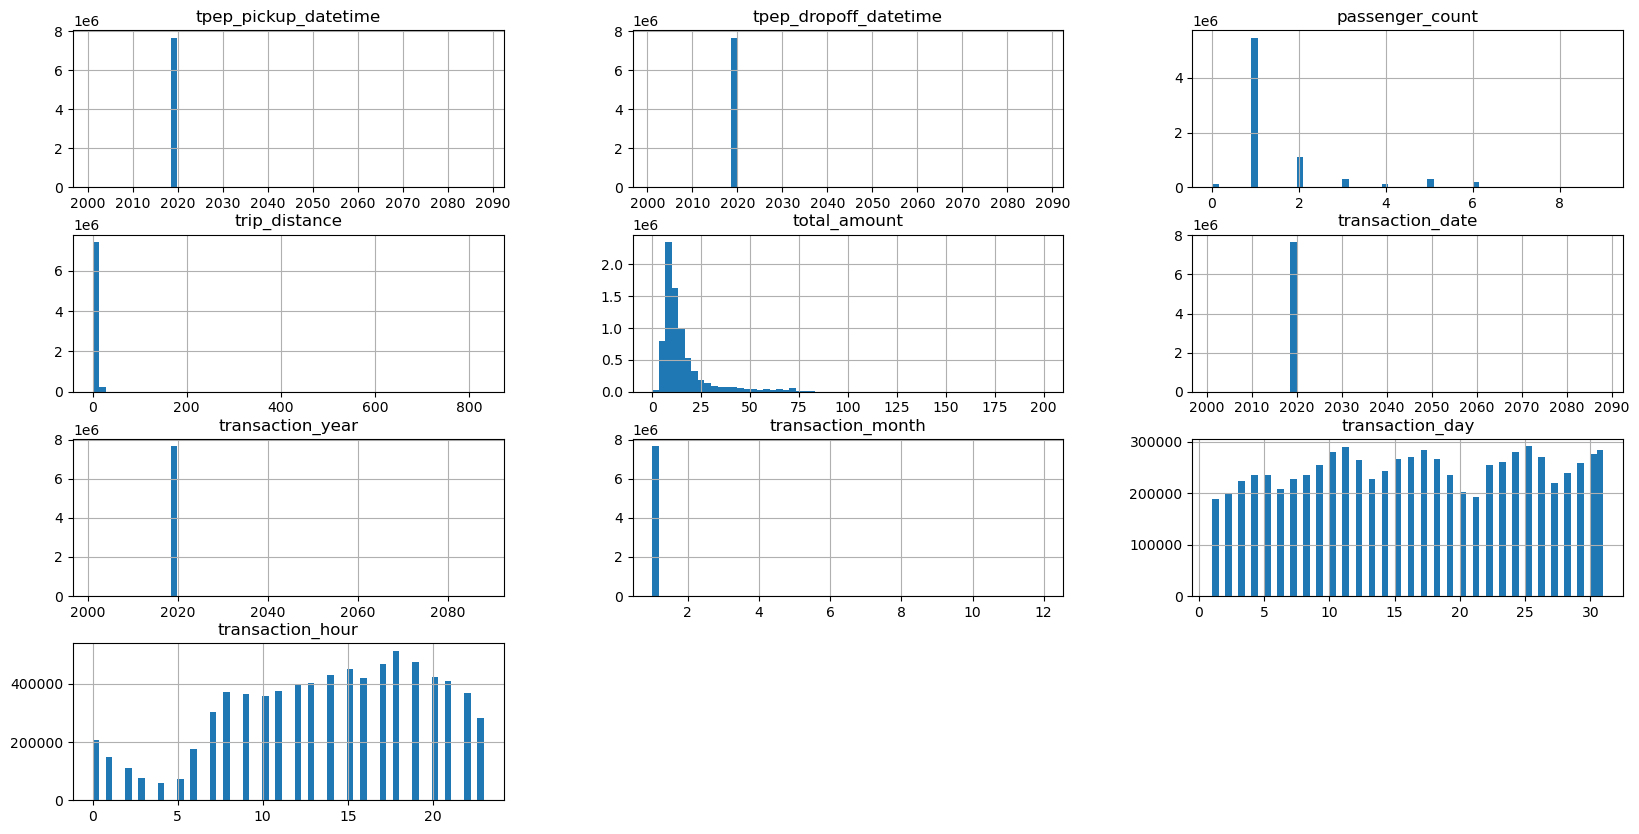

In [48]:
taxi_df_prepared.hist(figsize=(20,10), bins=60)

In [49]:
taxi_df_prepared = taxi_df_prepared[taxi_df_prepared['transaction_year']==2019]
taxi_df_prepared = taxi_df_prepared[taxi_df_prepared['transaction_month']==1]

In [50]:
categorical_columns = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']

In [51]:
numerical_columns = ['trip_distance','total_amount']

In [52]:
all_needed_columns = categorical_columns + numerical_columns

In [53]:
main_taxi_df = taxi_df_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7659111, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


In [54]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(102496, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


## Benchmark Model

In [55]:
df_for_benchmark_model = taxi_grouped_by_region.copy()

In [56]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark
target_feature_benchmark  = 'total_amount'

In [57]:
## Important note about what data to use for training on a model. use 80% of data for model then validate with other 20%

In [58]:
from sklearn.model_selection import train_test_split

X_bench = df_for_benchmark_model[input_features_benchmark]
y_bench = df_for_benchmark_model[target_feature_benchmark]

# one-hot encode (This means you want to not deal with the string data, this turns categorical data points to numberical ones)
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

In [59]:
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

In [60]:
## Now that model is trained, we can evaluate its accuracy

In [61]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 9.792455945773288
mean_squared_error 220.6510333856372
root_mean_squared_error 14.854327092993381
r2 0.21401031514659596


<Axes: xlabel='true', ylabel='pred'>

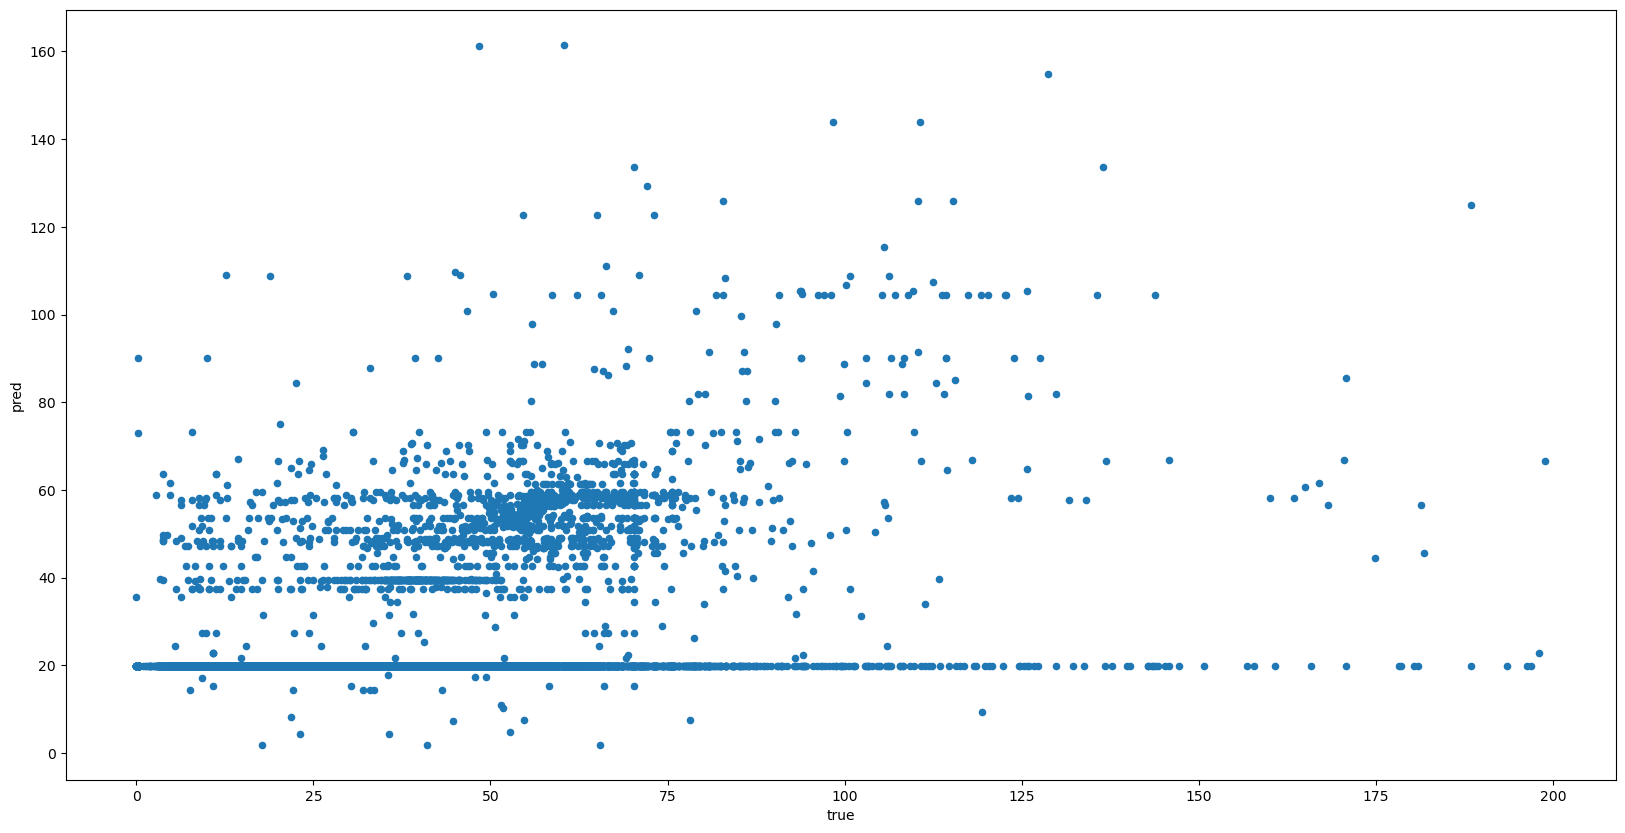

In [62]:
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

In [63]:
## Removed trip distance since it was too corellated with target, now data needs new features to improve metrics
## Ideas to improve accuracy: start and end location correlated with target?, certain days of week, 

In [64]:
df_with_new_features = taxi_grouped_by_region.copy()

In [65]:
df_with_new_features['transaction_week_day'] = df_with_new_features['transaction_date'].dt.weekday
df_with_new_features['weekend'] = df_with_new_features['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)


In [66]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018',
                        end='2020').date
df_with_new_features['is_holiday'] = df_with_new_features['transaction_date'].isin(holidays)

C:\Users\zunin\AppData\Local\Temp\ipykernel_32652\933541886.py:6: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_with_new_features['is_holiday'] = df_with_new_features['transaction_date'].isin(holidays)


In [67]:
df_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True


In [68]:
zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')

In [69]:
zone_lookup.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [70]:
zone_lookup = zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [71]:
df_with_new_features = df_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
df_with_new_features.drop('LocationID', axis=1, inplace=True)
df_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [72]:
##Now we have a df with days of week and if day is a holiday. Also the location of trip (Borough)

In [73]:
## Add in weather data

In [74]:
nyc_weather = pd.read_csv('data/nyc_weather.csv')
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,31.12.2019 22:00,6.1,65,6,100%.,0.3
1,31.12.2019 19:00,6.7,71,5,70 – 80%.,NaN
2,31.12.2019 16:00,7.2,66,5,50%.,NaN
3,31.12.2019 13:00,6.1,76,3,100%.,Trace of precipitation
4,31.12.2019 10:00,4.4,83,2,100%.,Trace of precipitation


In [75]:
nyc_weather.isna().sum()

date and time                 0
temperature                   0
humidity                      0
wind speed                    0
cloud cover                   4
amount of precipitation    2240
dtype: int64

In [76]:
##Weather data has some missing values for amount of precipitation

In [77]:
##Options to fill are either fill with same value, interpolaate, or fill with adjacent values

In [78]:
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].replace('Trace of precipitation', 0.1)
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].astype(float)
# option 1
# nyc_weather['amount of precipitation'].fillna(0, inplace=True)
# option 2
#nyc_weather['amount of precipitation'].fillna(method='ffill', inplace=True)
# option 3
nyc_weather['amount of precipitation'].interpolate(inplace=True)

C:\Users\zunin\AppData\Local\Temp\ipykernel_32652\3281803556.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc_weather['amount of precipitation'].interpolate(inplace=True)


In [79]:
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('70 – 80%.', 0.7)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('100%.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('20–30%.', 0.3)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('50%.', 0.5)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('no clouds', 0)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].astype(float)
nyc_weather['cloud cover'].interpolate(inplace=True)

C:\Users\zunin\AppData\Local\Temp\ipykernel_32652\4034767346.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)
C:\Users\zunin\AppData\Local\Temp\ipykernel_32652\4034767346.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to per

In [80]:
nyc_weather.loc[:,'date and time'] = pd.to_datetime(nyc_weather.loc[:,'date and time'])

C:\Users\zunin\AppData\Local\Temp\ipykernel_32652\531403737.py:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  nyc_weather.loc[:,'date and time'] = pd.to_datetime(nyc_weather.loc[:,'date and time'])


In [81]:
nyc_weather['hour'] = pd.to_datetime(nyc_weather['date and time']).dt.hour

In [82]:
nyc_weather['month'] = pd.to_datetime(nyc_weather['date and time']).dt.month

In [83]:
nyc_weather['day'] = pd.to_datetime(nyc_weather['date and time']).dt.day

In [84]:
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,2019-12-31 22:00:00,6.1,65,6,1.0,0.300000,22,12,31
1,2019-12-31 19:00:00,6.7,71,5,0.7,0.233333,19,12,31
2,2019-12-31 16:00:00,7.2,66,5,0.5,0.166667,16,12,31
3,2019-12-31 13:00:00,6.1,76,3,1.0,0.100000,13,12,31
4,2019-12-31 10:00:00,4.4,83,2,1.0,0.100000,10,12,31


In [85]:
df_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [86]:
nyc_taxi_with_weather = df_with_new_features.merge(nyc_weather, left_on = ['transaction_month','transaction_day','transaction_hour'], right_on = ['month','day','hour'], how='left')

print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()

(102496, 21)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,Borough,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,...,EWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,...,EWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,...,EWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,...,EWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,...,EWR,2019-01-01 10:00:00,15.6,62.0,11.0,0.7,0.473333,10.0,1.0,1.0


In [87]:
nyc_taxi_with_weather = nyc_taxi_with_weather.drop(['date and time','hour','month','day'], axis=1)

In [88]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR,15.6,62.0,11.0,0.7,0.473333


In [89]:
nyc_taxi_with_weather.isna().sum()

PULocationID                   0
transaction_date               0
transaction_month              0
transaction_day                0
transaction_hour               0
trip_distance                  0
total_amount                   0
count_of_transactions          0
transaction_week_day           0
weekend                        0
is_holiday                     0
Borough                      709
temperature                65685
humidity                   65685
wind speed                 65685
cloud cover                65685
amount of precipitation    65685
dtype: int64

In [90]:
nyc_taxi_with_weather = nyc_taxi_with_weather.sort_values(['transaction_date','transaction_hour']).reset_index().drop('index',axis=1)

In [91]:
nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()
nyc_taxi_with_weather = nyc_taxi_with_weather.bfill()
nyc_taxi_with_weather.isna().sum()

C:\Users\zunin\AppData\Local\Temp\ipykernel_32652\4211400128.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()


PULocationID               0
transaction_date           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
count_of_transactions      0
transaction_week_day       0
weekend                    0
is_holiday                 0
Borough                    0
temperature                0
humidity                   0
wind speed                 0
cloud cover                0
amount of precipitation    0
dtype: int64

In [92]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2019-01-01,1,1,0,3.020000,14.300000,2,1,False,True,Queens,8.3,97.0,0.0,1.0,29.0
1,100,2019-01-01,1,1,0,2.801852,18.130000,54,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
2,106,2019-01-01,1,1,0,2.593333,15.373333,3,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0
3,107,2019-01-01,1,1,0,2.437458,14.897458,421,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
4,11,2019-01-01,1,1,0,1.795000,9.300000,2,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0


## Model Training

In [93]:
data_for_model = nyc_taxi_with_weather.copy()

In [94]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'humidity', 'wind speed', 'cloud cover',
       'amount of precipitation']
target_feature = 'total_amount'

In [95]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_feature]

# one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [96]:
from sklearn.tree import DecisionTreeRegressor 

decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [97]:
## Note that max_depth can contriubte to overfit or underfit, not specifying a value will set to maximum depth of capability

In [98]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 8.527103102677051
mean_squared_error 200.36962687791717
root_mean_squared_error 14.15519787491214
r2 0.29002376923311


<Axes: xlabel='true', ylabel='pred'>

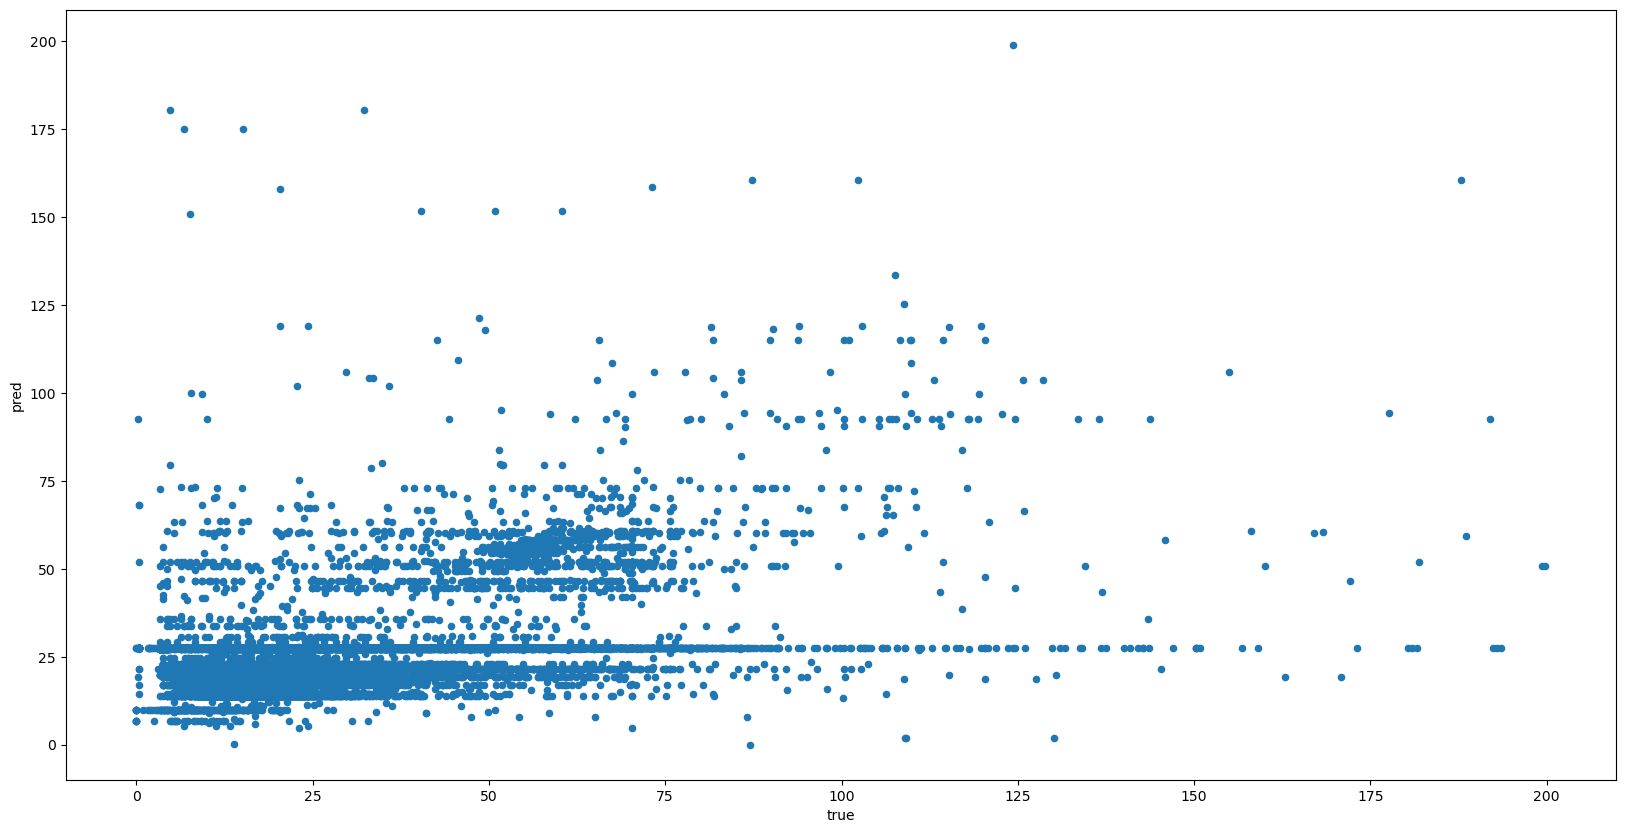

In [99]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

## Random Forest

In [100]:
from sklearn.ensemble import RandomForestRegressor

rando_model = RandomForestRegressor()
rando_model.fit(X_train, y_train)

RandomForestRegressor()

In [101]:
model_at_hand = rando_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 7.440676357950969
mean_squared_error 174.62548002414007
root_mean_squared_error 13.214593449067591
r2 0.3812438440136572


In [102]:
## R2 value of .38 is good in this case (According to tutorial video)

## Gradient Boosting

In [103]:
from sklearn.ensemble import GradientBoostingRegressor

gradBooster = GradientBoostingRegressor()
gradBooster.fit(X_train, y_train)

GradientBoostingRegressor()

In [104]:
model_at_hand = gradBooster

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 8.319550648276408
mean_squared_error 176.3998577566963
root_mean_squared_error 13.28156081779157
r2 0.374956633550943


<Axes: xlabel='true', ylabel='pred'>

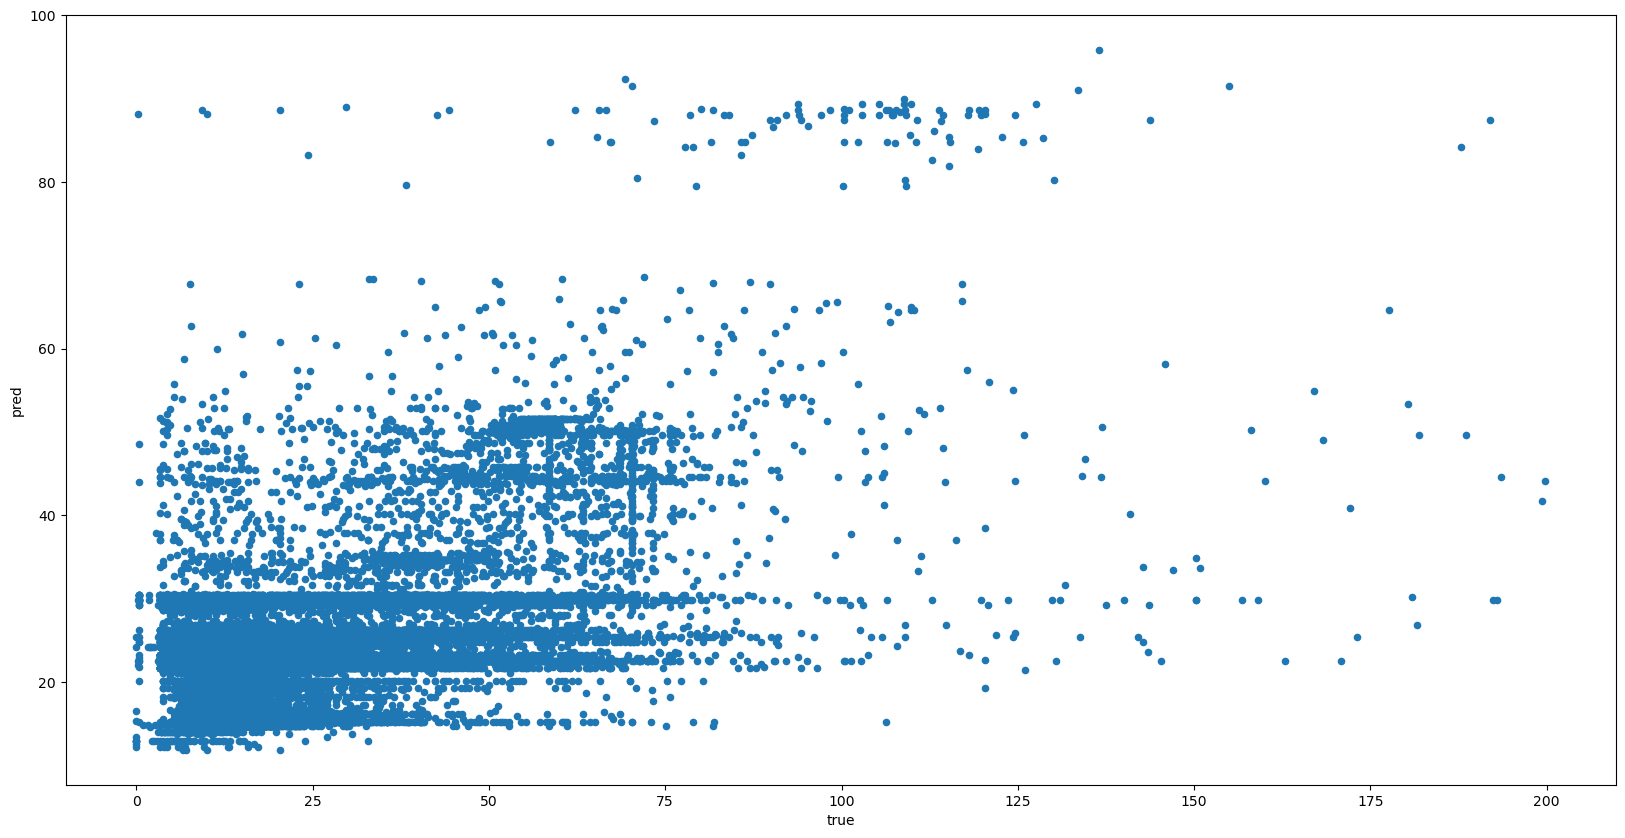

In [105]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<Axes: >

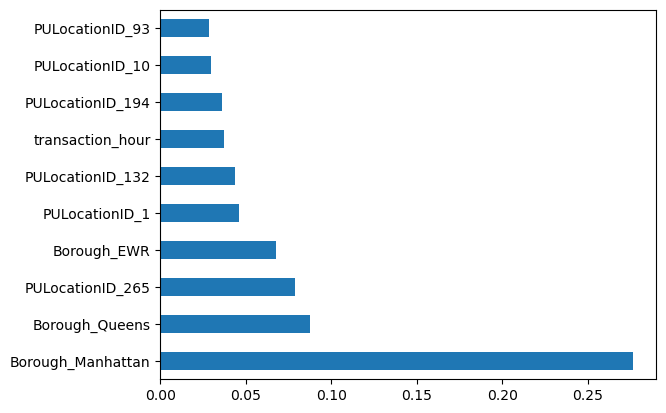

In [106]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')) 

## Tuning

In [107]:
## Will go with Random forest model

In [108]:
import numpy as np

In [109]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,50,100,150,200,300,500]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [110]:
import pprint as pp

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [111]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

performances = pd.DataFrame.from_dict(rf_random.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\zunin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zunin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zunin\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\zunin\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\zunin\anaconda3\Lib\site-packages\sk

In [112]:
import time
t0= time.time()

best = RandomForestRegressor(n_estimators=1800,min_samples_split= 2,
min_samples_leaf= 4,
max_features= 'sqrt',
max_depth= 300,
bootstrap= True)
best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  324.9407432079315  seconds
mean_absolute_error 7.375439139015902
mean_squared_error 159.97048488967388
root_mean_squared_error 12.64794389968875
r2 0.43317136601186335


In [113]:
from sklearn.ensemble import RandomForestRegressor

import time
t0= time.time()

second_best = RandomForestRegressor(n_estimators=200,min_samples_split= 10,
min_samples_leaf= 2,
max_features= 'sqrt',
max_depth= 150,
bootstrap= True)
second_best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = second_best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  37.8213677406311  seconds
mean_absolute_error 7.307972856750676
mean_squared_error 159.06074726360288
root_mean_squared_error 12.611928768574728
r2 0.4363948689988618


<Axes: xlabel='true', ylabel='pred'>

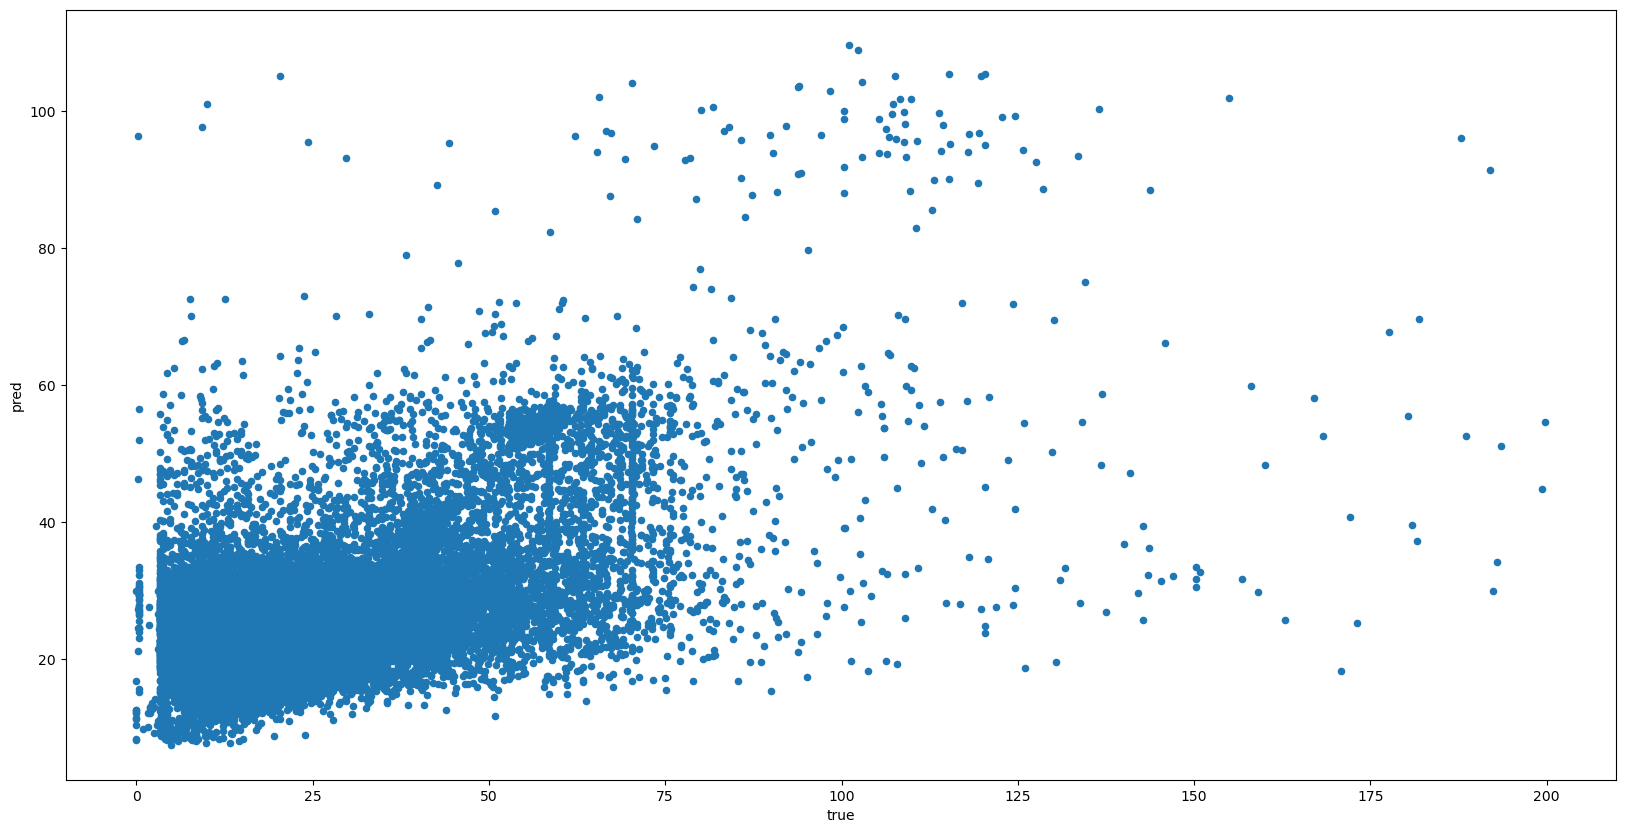

In [114]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')